In [1]:
from matplotlib import pyplot as plt

from pyloki.config import ParamLimits, PulsarSearchConfig
from pyloki.search import ffa_search
from pyloki.simulation.pulse import PulseSignalConfig

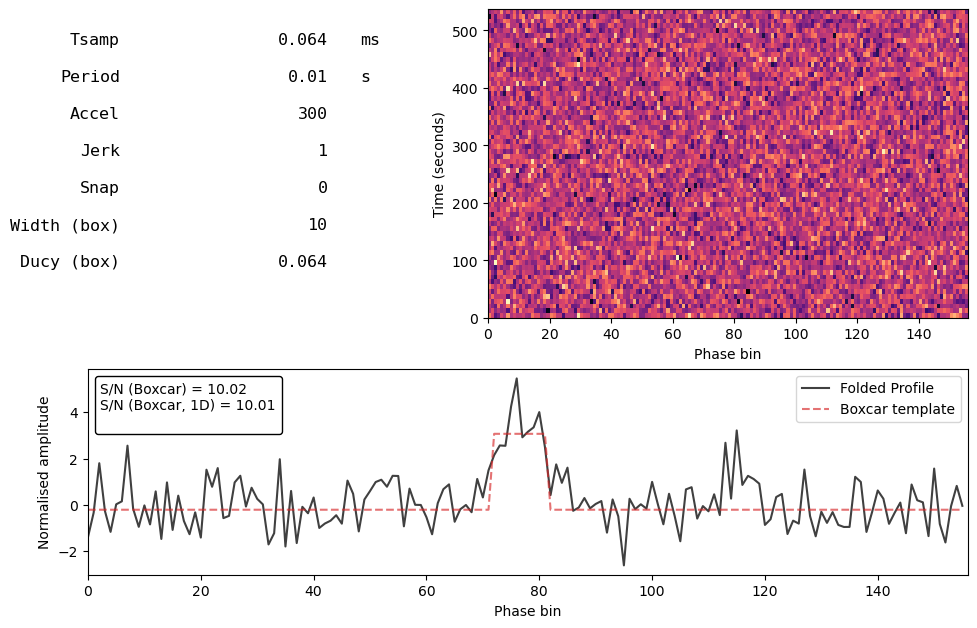

In [2]:
pulsar_period = 0.010
dt = 64e-6
accel = 300
jerk = 1
nsamps = 2**23
mod_kwargs = {"acc": accel, "jerk": jerk}
cfg = PulseSignalConfig(period=pulsar_period, dt=dt, nsamps=nsamps, snr=10, ducy=0.1,
                        mod_kwargs=mod_kwargs)
tim_data = cfg.generate(shape="gaussian")
tim_data.plot_fold(cfg.freq, cfg.fold_bins, mod_kwargs=mod_kwargs)
plt.show()

In [3]:
tol_bins = 4 #cfg.tol_bins
fold_bins = 64# cfg.fold_bins
p = ParamLimits.from_upper([jerk, accel, cfg.freq], (-1.5, 1.5), cfg.tobs)
print(f"Param limits: {p.limits}")
bseg_brute = cfg.nsamps // 128
search_cfg = PulsarSearchConfig(nsamps=cfg.nsamps, tsamp=cfg.dt, nbins=fold_bins, tol_bins=tol_bins, param_limits=p.limits,
                                bseg_brute=bseg_brute, ducy_max=0.2, wtsp=1.5, use_fft_shifts=True)
dyp, pgram = ffa_search(tim_data, search_cfg)

Param limits: [(np.float64(-1.5), np.float64(1.5)), (np.float64(-102.65318400000001), np.float64(702.653184)), (np.float64(99.95511100138201), np.float64(100.04488899861799))]


2025-06-12 11:19:00 INFO     - pyloki.ffa - FFA initialize: Grid sizes: [1.21833673e+05 8.51679103e+04             
                             2.98023224e-02]

                    INFO     - pyloki.ffa - ffa level:  0, leaves: 1.58, fold dims: (128, 1, 1, 3, 2, 33)

                    INFO     - pyloki.ffa - ffa_initialize finished, Elapsed time: 0.133 seconds

Output()

2025-06-12 11:19:03 INFO     - pyloki.ffa - ffa level:  1, leaves:  2.58, fold dims: (64, 1, 1, 6, 2, 33)

                    INFO     - pyloki.ffa - ffa level:  2, leaves:  3.58, fold dims: (32, 1, 1, 12, 2, 33)

                    INFO     - pyloki.ffa - ffa level:  3, leaves:  4.58, fold dims: (16, 1, 1, 24, 2, 33)

                    INFO     - pyloki.ffa - ffa level:  4, leaves:  6.58, fold dims: (8, 1, 2, 48, 2, 33)

                    INFO     - pyloki.ffa - ffa level:  5, leaves:  9.75, fold dims: (4, 1, 9, 96, 2, 33)

                    INFO     - pyloki.ffa - ffa level:  6, leaves: 15.42, fold dims: (2, 6, 38, 192, 2, 33)

2025-06-12 11:19:06 INFO     - pyloki.ffa - ffa level:  7, leaves: 21.53, fold dims: (1, 51, 154, 385, 2, 33)

                    INFO     - pyloki.ffa - FFA complete: Grid sizes: [5.80948224e-02 5.19823671e+00               
                             2.32830644e-04]

                    INFO     - pyloki.ffa - ffa_execute finished, Elapsed time: 6.401 seconds

                    INFO     - pyloki.ffa - Using FFT for phase shifts: Inverse FFTing the fold

                    INFO     - pyloki.ffa - Fold shape: (1, 51, 154, 385, 2, 33)

In [4]:
print(pgram.get_indices_summary(true_values={"jerk": cfg.mod_kwargs["jerk"], "accel": cfg.mod_kwargs["acc"], "freq": cfg.freq},))
print(pgram.get_summary())

True param indices: (42, 76, 192)
Best param indices: (np.int64(42), np.int64(77), np.int64(192), np.int64(4))
Best S/N: 8.36
Best Period: 0.01
Best jerk: 0.980769230769231
Best accel: 302.5977624774194
Best freq: 100.0
Best width: 6


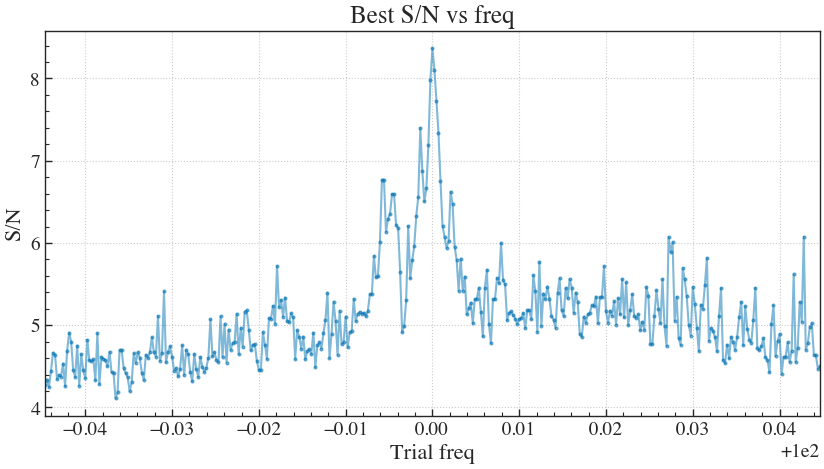

In [5]:
fig = pgram.plot_1d("freq", figsize=(10, 5))
plt.show()

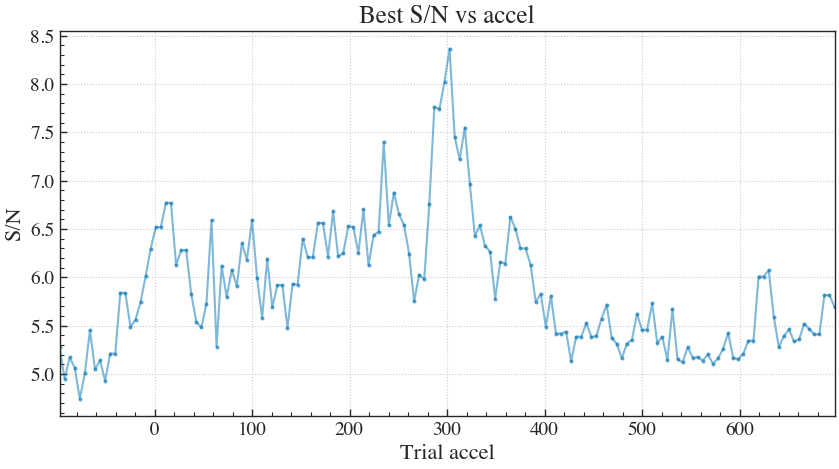

In [6]:
fig = pgram.plot_1d("accel", figsize=(10, 5))
plt.show()

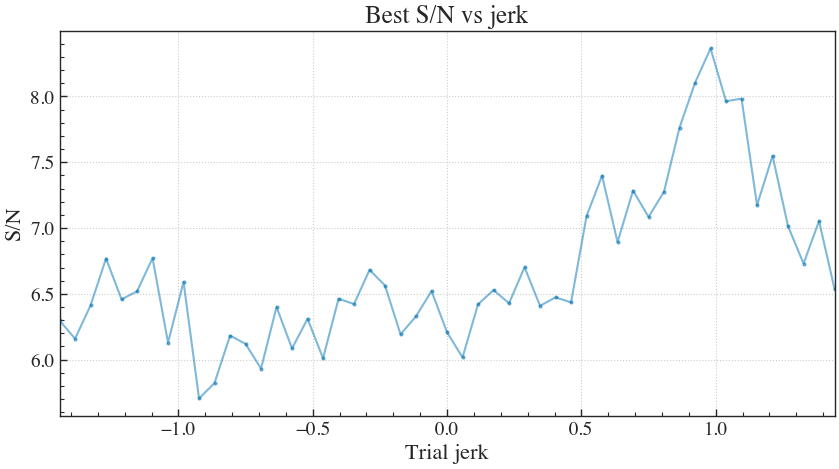

In [7]:
fig = pgram.plot_1d("jerk", figsize=(10, 5))
plt.show()

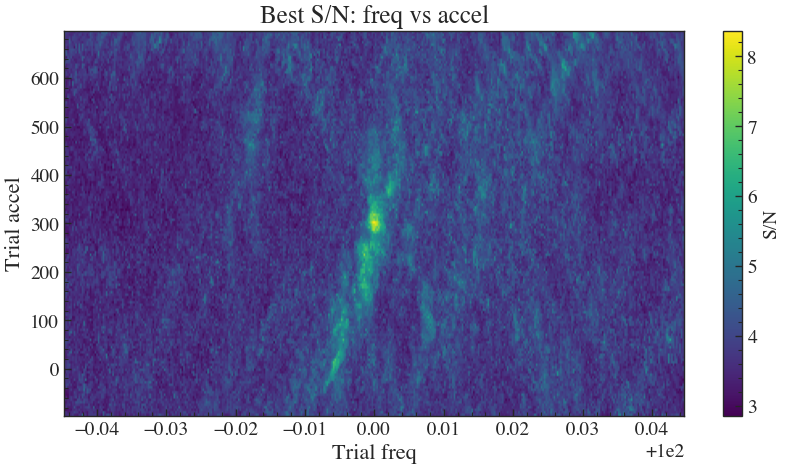

In [8]:
fig = pgram.plot_2d("freq", "accel", figsize=(10, 5))
plt.show()

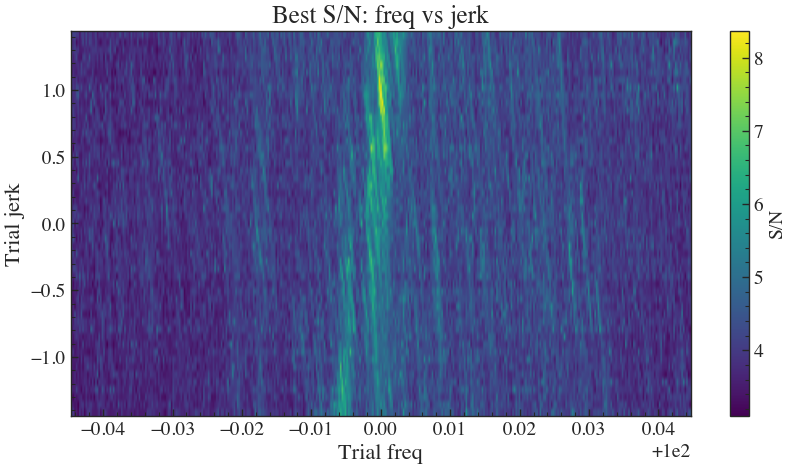

In [9]:
fig = pgram.plot_2d("freq", "jerk", figsize=(10, 5))
plt.show()

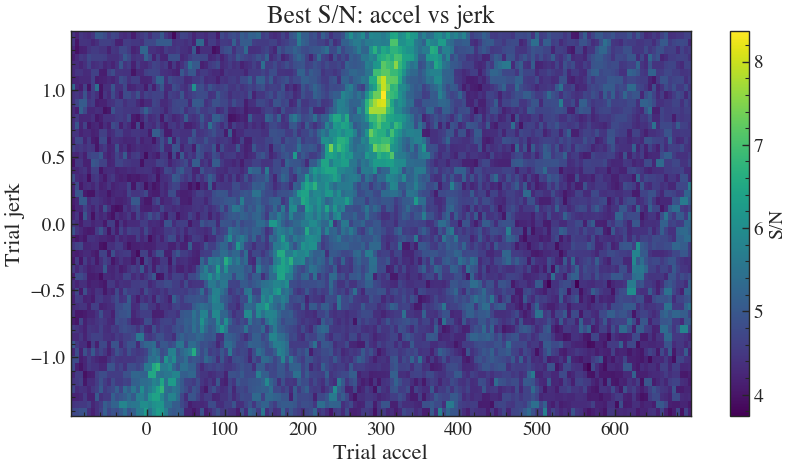

In [10]:
fig = pgram.plot_2d("accel", "jerk", figsize=(10, 5))
plt.show()